In [7]:
import zipfile

# Replace 'spambase.zip' with your actual zip filename if different
zip_file = "spambase.zip"

# Extract the zip contents
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

print("Zip file extracted!")



Zip file extracted!


In [9]:
import os
print(os.listdir())


['.anaconda', '.cache', '.conda', '.condarc', '.continuum', '.eclipse', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.node_repl_history', '.p2', '.vscode', 'AI LAB', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Desktop', 'dij.c', 'Documents', 'Downloads', 'eclipse', 'eclipse-installer', 'eclipse-workspace', 'Favorites', 'javaproject', 'Links', 'Local Settings', 'mllab3.ipynb', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{829eb9be-7d9f-11ef-adb3-2c58b98b5d75}.TM.blf', 'NTUSER.DAT{829eb9be-7d9f-11ef-adb3-2c58b98b5d75}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{829eb9be-7d9f-11ef-adb3-2c58b98b5d75}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'phy086', 'Pictures', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'spambase.data', 'spambase.DOCUMENTATION', 'spambase.names', 'spambase.zip', 'Start Menu', 'Templates', 'Untitled.ip

In [11]:
import pandas as pd

column_names = [f"feature_{i}" for i in range(1, 58)] + ["is_spam"]
data = pd.read_csv("spambase.data", header=None, names=column_names)

print(data.head())


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_7  feature_8  feature_9  feature_10  ...  feature_49  feature_50  \
0       0.00       0.00       0.00        0.00  ...        0.00       0.000   
1       0.21       0.07       0.00        0.94  ...        0.00       0.132   
2       0.19       0.12       0.64        0.25  ...        0.01       0.143   
3       0.31       0.63       0.31        0.63  ...        0.00       0.137   
4       0.31       0.63       0.31        0.63  ...        0.00       0.135   

   feature_51  feature_52  feature_53  feature_54  feature_55  feature_56  \
0         0.0       0

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
column_names = [f"feature_{i}" for i in range(1, 58)] + ["is_spam"]
data = pd.read_csv("spambase.data", header=None, names=column_names)

# Check the first 5 rows
print(data.head())


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_7  feature_8  feature_9  feature_10  ...  feature_49  feature_50  \
0       0.00       0.00       0.00        0.00  ...        0.00       0.000   
1       0.21       0.07       0.00        0.94  ...        0.00       0.132   
2       0.19       0.12       0.64        0.25  ...        0.01       0.143   
3       0.31       0.63       0.31        0.63  ...        0.00       0.137   
4       0.31       0.63       0.31        0.63  ...        0.00       0.135   

   feature_51  feature_52  feature_53  feature_54  feature_55  feature_56  \
0         0.0       0

In [17]:
X = data.drop("is_spam", axis=1)  # All columns except the label
y = data["is_spam"]               # Target column


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)


GaussianNB()

In [25]:
y_pred = nb.predict(X_test_scaled)


In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8182476466328747

Confusion Matrix:
 [[586 218]
 [ 33 544]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82       804
           1       0.71      0.94      0.81       577

    accuracy                           0.82      1381
   macro avg       0.83      0.84      0.82      1381
weighted avg       0.85      0.82      0.82      1381



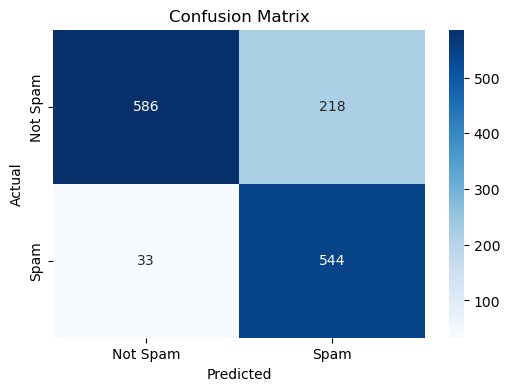

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [31]:
# Assuming you have already done the train/test split and trained the model

# Predict labels for test set
y_pred = nb.predict(X_test_scaled)

# Also get the predicted probabilities for each class (optional but useful)
y_prob = nb.predict_proba(X_test_scaled)

# Create a DataFrame to compare actual, predicted, and probabilities
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Prob_Not_Spam": y_prob[:, 0],
    "Prob_Spam": y_prob[:, 1]
})

# Show the first 20 classified results (you can adjust this number)
print(results.head(20))


    Actual  Predicted  Prob_Not_Spam      Prob_Spam
0        0          1   3.441321e-17   1.000000e+00
1        0          0   9.941070e-01   5.893021e-03
2        0          0   1.000000e+00   2.569205e-09
3        1          1  9.653875e-183   1.000000e+00
4        0          0   1.000000e+00   0.000000e+00
5        1          1   2.434756e-44   1.000000e+00
6        0          0   1.000000e+00   0.000000e+00
7        0          0   1.000000e+00   0.000000e+00
8        0          0   1.000000e+00   0.000000e+00
9        0          1   7.885345e-16   1.000000e+00
10       0          0   1.000000e+00   1.690314e-36
11       0          1   2.200627e-20   1.000000e+00
12       0          0   1.000000e+00  2.888915e-271
13       1          1   5.918588e-19   1.000000e+00
14       1          0   9.999978e-01   2.157025e-06
15       0          0   1.000000e+00   0.000000e+00
16       1          1   5.062629e-24   1.000000e+00
17       1          0   1.000000e+00   6.987118e-86
18       1  